# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [30]:
print("Чтобы можно было в точности воспроизвести результаты псевдорандомных функций")

Чтобы можно было в точности воспроизвести результаты псевдорандомных функций


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [31]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

#df_train = pd.read_csv('cars_train.csv')
#df_test = pd.read_csv('cars_test.csv')


print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [32]:
df_train.iloc[np.random.randint(0, df_train.shape[0], 10)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6966,Fiat Linea Emotion,2010,125000,40000,Petrol,Individual,Manual,Second Owner,16.0 kmpl,1368 CC,90 bhp,115Nm@ 4500rpm,5.0
4613,Maruti Celerio ZXI Optional,2014,415000,46000,Petrol,Dealer,Manual,First Owner,21.63 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0
4571,Tata Indigo LX,2008,85000,120000,Diesel,Individual,Manual,First Owner,17.0 kmpl,1405 CC,70 bhp,"13.5@ 2,500(kgm@ rpm)",5.0
2000,Tata Indica V2 eLX,2012,83000,90000,Diesel,Individual,Manual,Second Owner,25.0 kmpl,1396 CC,69 bhp,140Nm@ 1800-3000rpm,5.0
2756,Tata Bolt Quadrajet XE,2017,450000,50000,Diesel,Individual,Manual,First Owner,22.95 kmpl,1248 CC,74 bhp,190Nm@ 1750-3000rpm,5.0
1668,Maruti Alto LXi,2007,130000,88700,Petrol,Individual,Manual,Third Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
5989,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
6914,Hyundai EON Sportz,2012,195000,35000,Petrol,Individual,Manual,Second Owner,21.1 kmpl,814 CC,55.2 bhp,74.5Nm@ 4000rpm,5.0
1460,Honda Mobilio V i VTEC,2015,500000,35000,Petrol,Individual,Manual,First Owner,17.3 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,7.0
3636,Volvo V40 D3 R-Design,2018,2475000,2000,Diesel,Dealer,Automatic,First Owner,16.8 kmpl,1984 CC,150 bhp,350Nm@ 1500-2750rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [33]:
pd.concat([df_test.iloc[:5],df_test.iloc[-5:] ], axis=0)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [34]:
print(df_test.describe(include='all'))
print(df_train.describe(include="all"))

                       name         year  selling_price      km_driven  \
count                  1000  1000.000000   1.000000e+03    1000.000000   
unique                  621          NaN            NaN            NaN   
top     Maruti Alto 800 LXI          NaN            NaN            NaN   
freq                     15          NaN            NaN            NaN   
mean                    NaN  2013.681000   6.179010e+05   71393.341000   
std                     NaN     4.012149   7.585539e+05   48486.218662   
min                     NaN  1995.000000   3.100000e+04    1303.000000   
25%                     NaN  2011.000000   2.500000e+05   37000.000000   
50%                     NaN  2014.000000   4.349990e+05   61500.000000   
75%                     NaN  2017.000000   6.700000e+05  100000.000000   
max                     NaN  2020.000000   6.000000e+06  375000.000000   

          fuel seller_type transmission        owner    mileage   engine  \
count     1000        1000         

(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [35]:
df_train.columns[df_train.isna().sum() > 0]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [36]:
names_without_target = ['name', 'year', "km_driven", "fuel", "seller_type" , "transmission", "owner", "mileage", "engine", "max_power", "torque", "seats"]
df_train_sub = df_train[ names_without_target ]
df_train_sub.duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [37]:
df_train_sub[df_train_sub.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [38]:
df_train.drop_duplicates(subset=names_without_target, inplace = True, keep='first')
df_train.shape

(5840, 13)

In [39]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [40]:
df_train.reindex

<bound method DataFrame.reindex of                                    name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
6992            Hyundai Santro Xing GLS  2008         120000     191000   
6993  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6994                  Hyundai i20 Magna  2013         320000     110000   
6995              Hyundai Verna CRDi SX  2007         135000     119000   
6996             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [41]:
def mileage_check(val): # не стал различать mlpl  и  km/kg - не ясно килограмм чего имеется в виду и как это конвертировать
    if not(pd.isna(val)):
        return re.search(r'[\d]*[\.][\d]*', val).group(0)
    else:
        return val
    
def engine_check(val):
    if not(pd.isna(val)):
        return re.search(r'[\d]{1,6}', val).group(0)
    else:
        return val     
    
def max_power_check(val):
    if not(pd.isna(val)):
        if len(re.findall(r'([\d]*\.[\d]*|[\d]{1,5})', val)) > 0 :
            return re.search(r'([\d]*\.[\d]*|[\d]{1,5})', val).group(0)
        else:
            return np.nan
    else:
        return(val)



    
    
df_train["mileage"] = df_train["mileage"].map(lambda value: mileage_check(value))
df_test["mileage"] = df_test["mileage"].map(lambda value: mileage_check(value))


df_train["engine"] = df_train["engine"].map(lambda value: engine_check(value))
df_test["engine"] = df_test["engine"].map(lambda value: engine_check(value))


df_train["max_power"] = df_train["max_power"].map(lambda value: max_power_check(value))
df_test["max_power"] = df_test["max_power"].map(lambda value: max_power_check(value))





df_train.drop(['torque'], axis=1, inplace=True)# drop 'torque'
df_test.drop(['torque'], axis=1, inplace=True)# drop 'torque'


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [42]:
df_test['mileage'].fillna((( df_train['mileage'].astype(np.float)).median()) , inplace=True)
df_train['mileage'].fillna((( df_train['mileage'].astype(np.float)).median()) , inplace=True)


df_test['max_power'].fillna((( df_train['max_power'].astype(np.float)).median()) , inplace=True)
df_train['max_power'].fillna((( df_train['max_power'].astype(np.float)).median()) , inplace=True)


df_test['engine'].fillna((( df_train['engine'].astype(np.float)).median()) , inplace=True)
df_train['engine'].fillna((( df_train['engine'].astype(np.float)).median()) , inplace=True)


df_test['seats'].fillna((( df_train['seats'].astype(np.float)).median()) , inplace=True)
df_train['seats'].fillna((( df_train['seats'].astype(np.float)).median()) , inplace=True)





df_test['mileage'] = df_test['mileage'].astype(float)
df_train['mileage'] = df_train['mileage'].astype(float)


df_test['max_power'] = df_test['max_power'].astype(float)
df_train['max_power'] = df_train['max_power'].astype(float)




df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   object 
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


/tmp/ipykernel_65000/2184837892.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_test['mileage'].fillna((( df_train['mileage'].astype(np.float)).median()) , inplace=True)
/tmp/ipykernel_65000/2184837892.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_train['mileage'].fillna((( df_train['mileage'].astype(np.float)).median()) ,


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [43]:
print("Нет отношения порядка: от количества мест не растет и не убывает цена. Тут каждому покупателю по целям, например семейному человеку лучше больше мест и дорогой внедорожник, а холостому может понравится дорогой двухместный спорткар ")

Нет отношения порядка: от количества мест не растет и не убывает цена. Тут каждому покупателю по целям, например семейному человеку лучше больше мест и дорогой внедорожник, а холостому может понравится дорогой двухместный спорткар 


In [44]:

df_test['engine'] = df_test['engine'].astype(np.int)
df_train['engine'] = df_train['engine'].astype(np.int)

df_test['seats'] = df_test['seats'].astype(np.int)
df_train['seats'] = df_train['seats'].astype(np.int)

df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5840 entries, 0 to 6996
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 593.1+ KB


/tmp/ipykernel_65000/825064112.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_test['engine'] = df_test['engine'].astype(np.int)
/tmp/ipykernel_65000/825064112.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecate

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

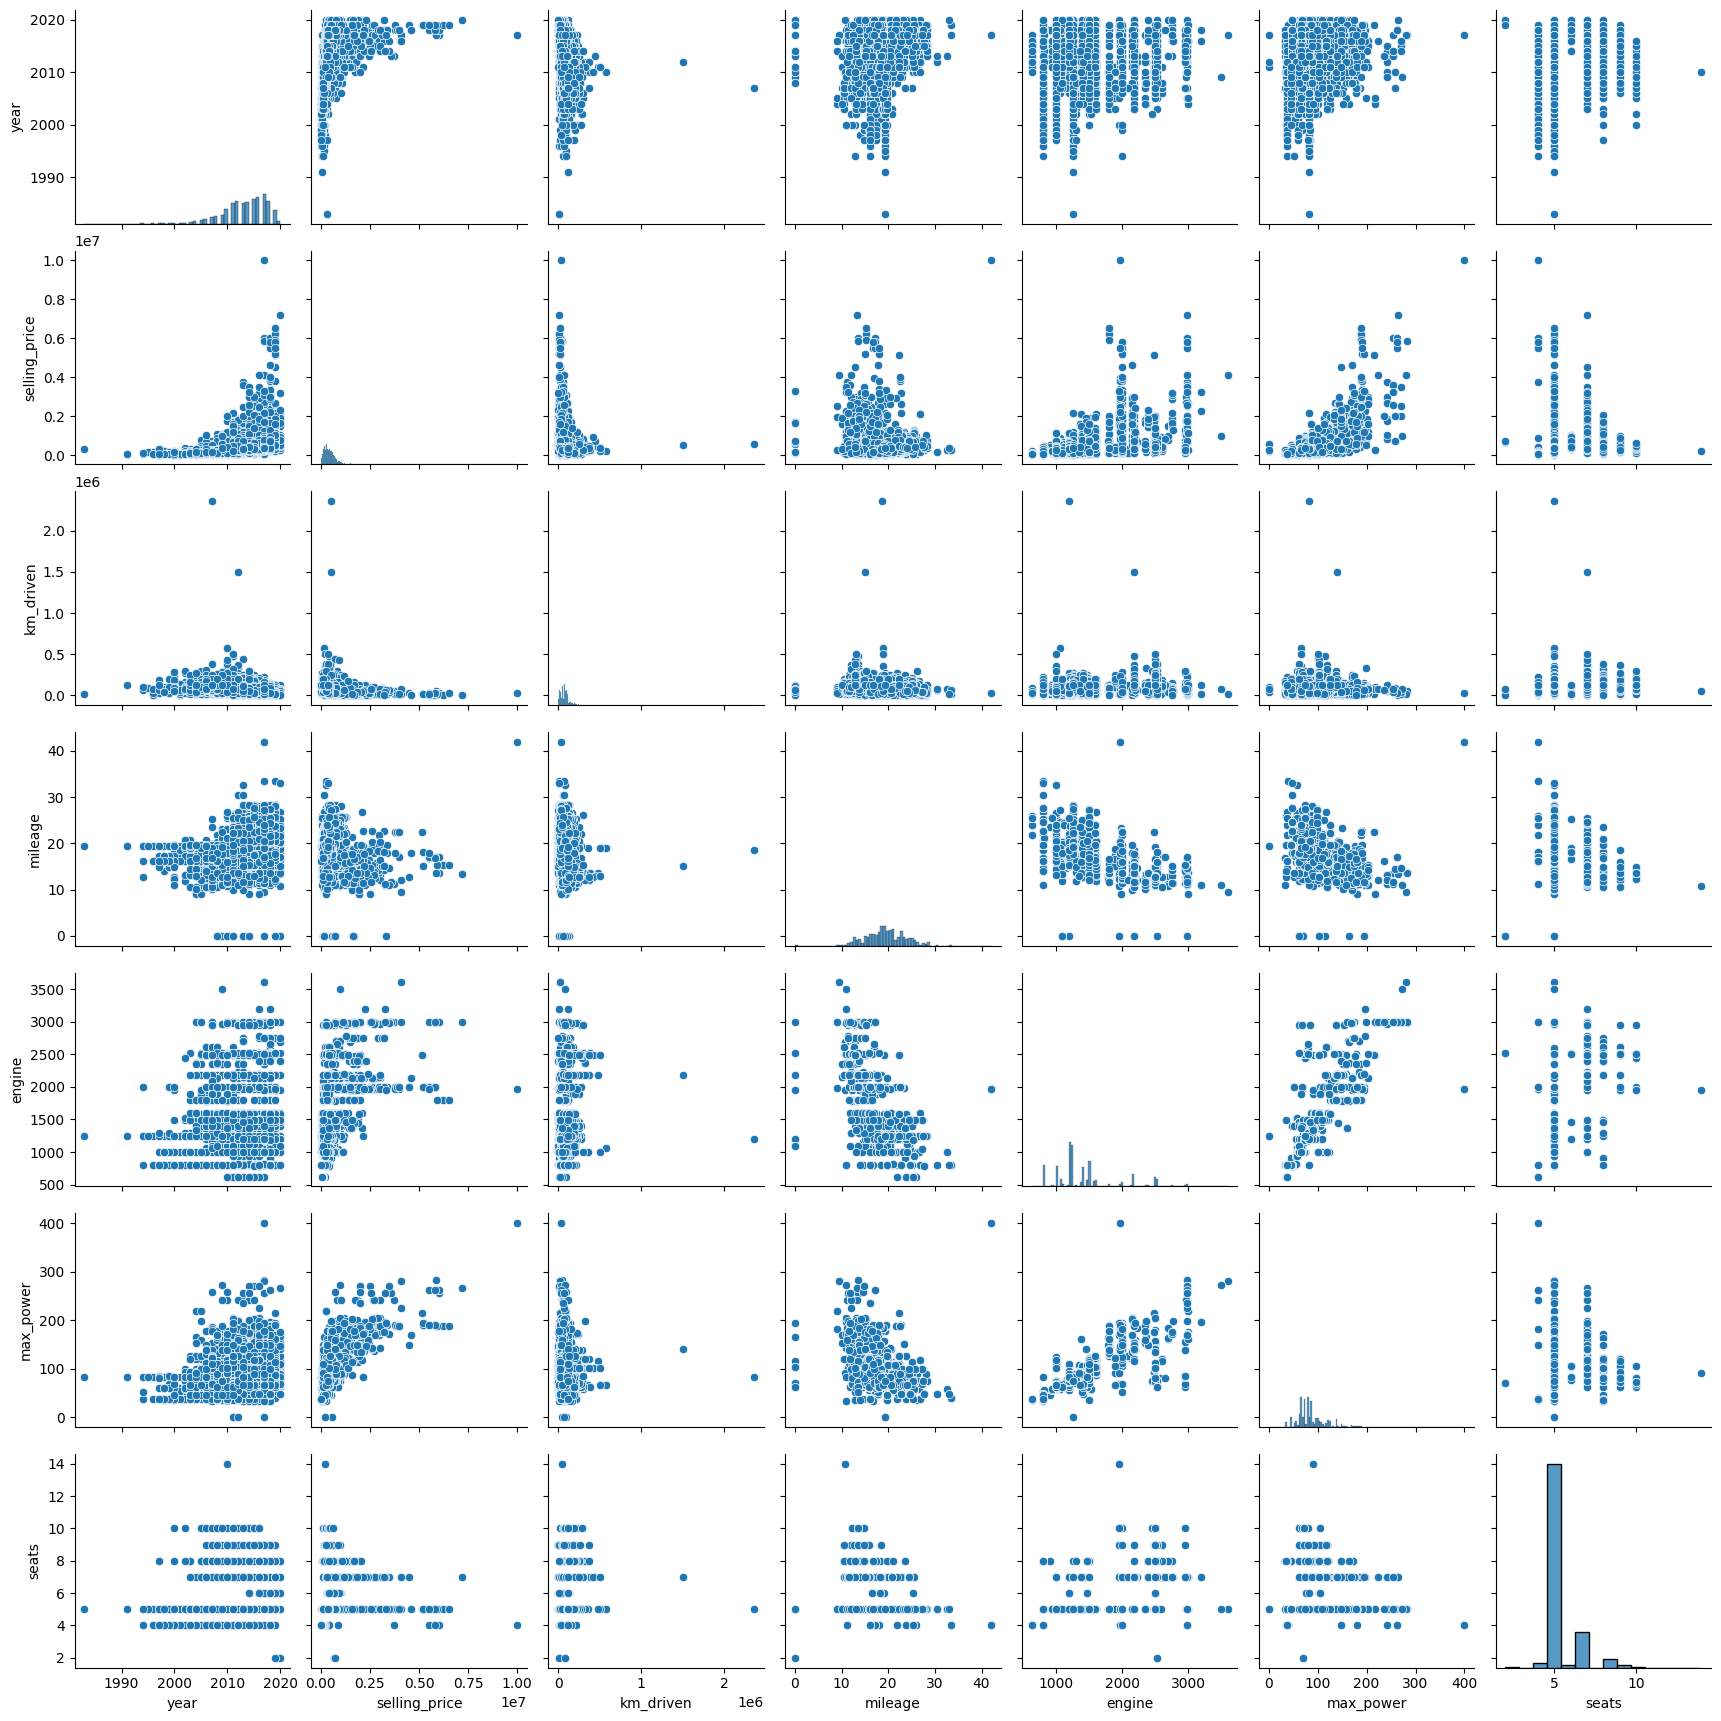

In [45]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [55]:
print("\tВидна зависимость цены от возраста (но не совсем линейная - есть много 'молодых' и дешевых авто), а также мощности и объема двигателя. В целом чисто выраженных зависимостей не наблюдается.")

print("\n\tЗаметна линейная корреляция мощности и объема двигателя." )

print("\n\tЕсли поискать, то еще чего-нибудь можно найти.")

	Видна зависимость цены от возраста (но не совсем линейная - есть много 'молодых' и дешевых авто), а также мощности и объема двигателя. В целом чисто выраженных зависимостей не наблюдается.

	Заметна линейная корреляция мощности и объема двигателя.

	Если поискать, то еще чего-нибудь можно найти.


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

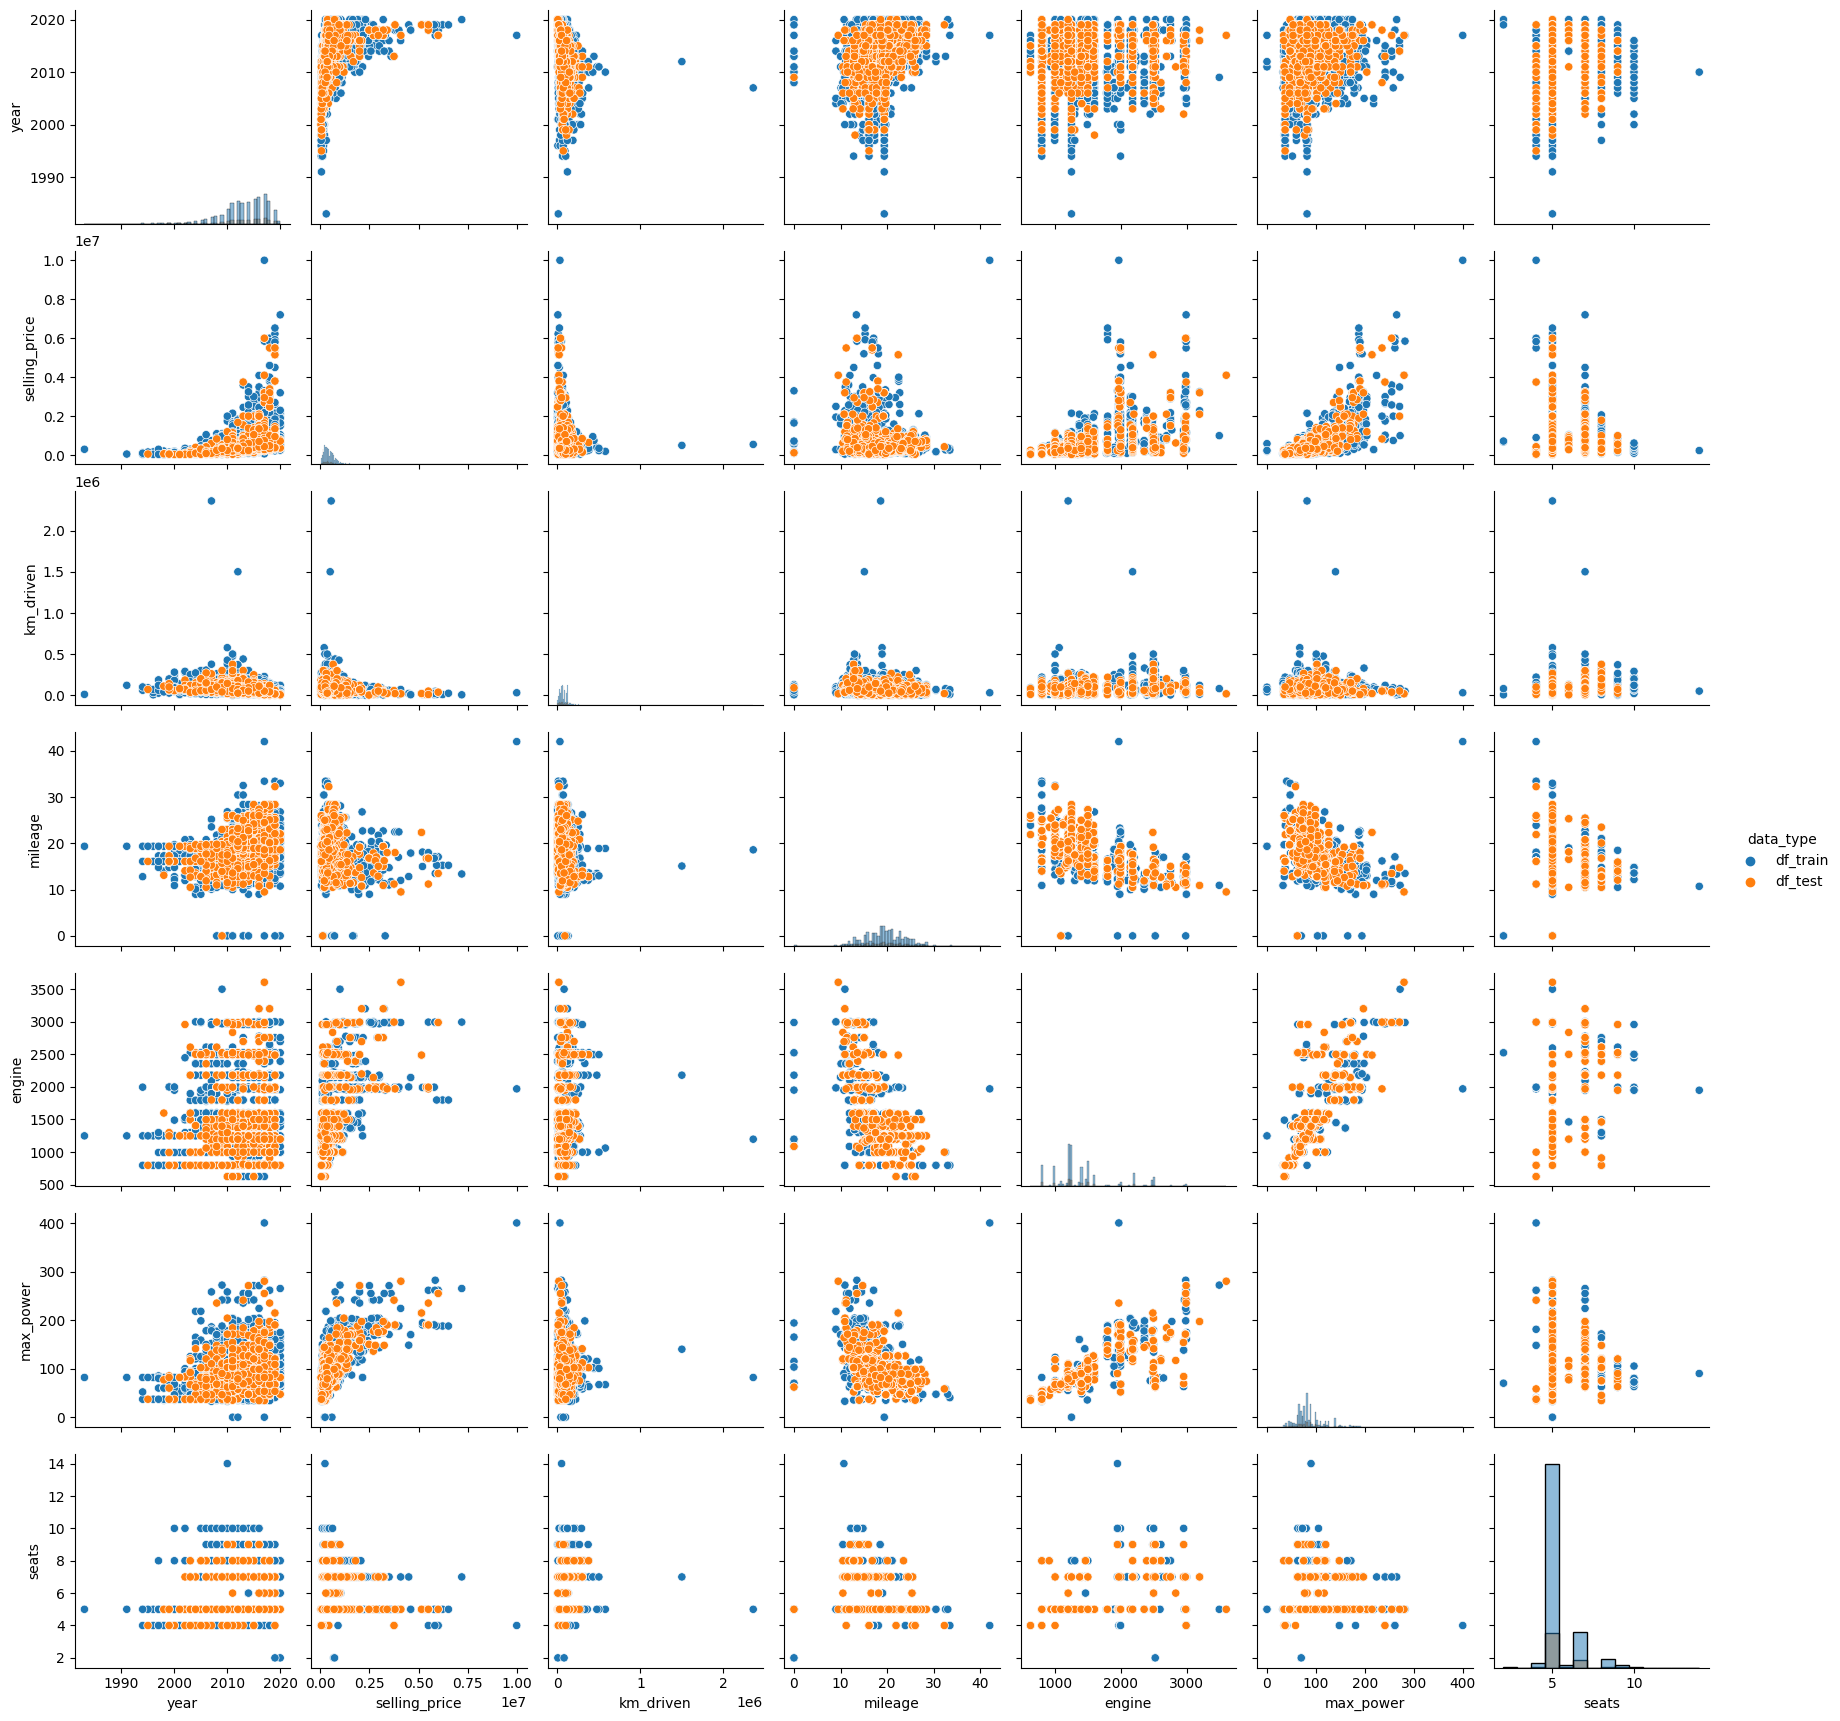

In [56]:
df_train["data_type"] = "df_train"
df_test["data_type"] = "df_test"

df = pd.concat([df_train, df_test], ignore_index=True)
df_train.drop(['data_type'], axis=1, inplace=True)# drop 'data_type'
df_test.drop(['data_type'], axis=1, inplace=True)# drop 'data_type'

sns.pairplot(df, hue="data_type", diag_kind="hist")

In [57]:
print("\n\tДа, в целом очень похожи. Разве что в тесте нет 10-местных машин, пробег поменьше, возраст помоложе.")


	Да, в целом очень похожи. Разве что в тесте нет 10-местных машин, пробег поменьше, возраст помоложе.


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

/tmp/ipykernel_65000/820319921.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True)


<AxesSubplot: >

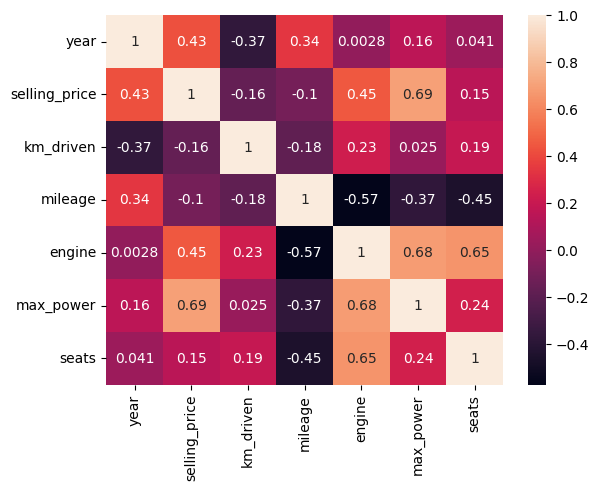

In [58]:
sns.heatmap(df_train.corr(), annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [327]:
print("\n\t Объем двигателя и возраст (год). \n\t Мощность и цена, мощность и объем двигателя, объем двигателя и количество мест.\n\t На половину правильно. Вторая половина звучит как \"чем больше километров проехала машина к дате продаж, тем, скорее всего,  меньше год\". Т.е. только по цифрам мы не можем судить о причине линейной зависимости - только о ее наличии, величине и знаке.  " )


	 Объем двигателя и возраст (год). 
	 Мощность и цена, мощность и объем двигателя, объем двигателя и количество мест.
	 На половину правильно. Вторая половина звучит как "чем больше километров проехала машина к дате продаж, тем, скорее всего,  меньше год". Т.е. только по цифрам мы не можем судить о причине линейной зависимости - только о ее наличии, величине и знаке.  


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

In [62]:
np.corrcoef(df_train["selling_price"], df_train["max_power"])

array([[1.        , 0.69281402],
       [0.69281402, 1.        ]])

<AxesSubplot: xlabel='selling_price', ylabel='max_power'>

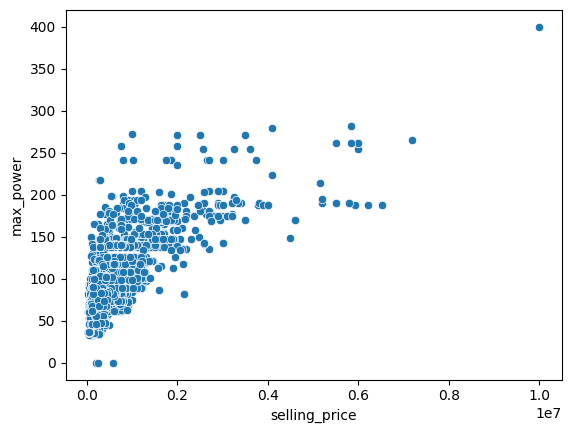

In [59]:
sns.scatterplot(data=df_train, x="selling_price", y="max_power")

In [63]:
np.corrcoef(df_train["engine"], df_train["max_power"])

array([[1.        , 0.68111681],
       [0.68111681, 1.        ]])

In [64]:
# Хотя визуально "engine" и "max_power" более линейно выглядят

<AxesSubplot: xlabel='engine', ylabel='max_power'>

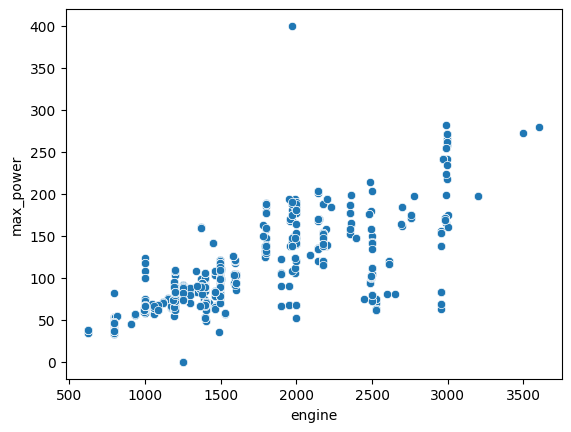

In [60]:
sns.scatterplot(data=df_train, x="engine", y="max_power")

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

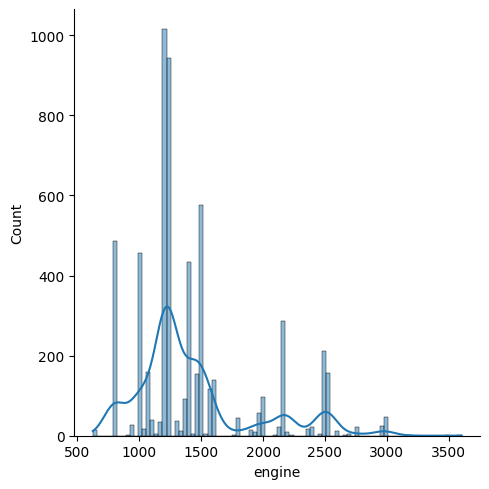

In [65]:
# Заметна дискретность признаков engine и seats. Возможно их впоследствии стоит перевести в разряд 
# категориальных, либо еще более дискретизировать: например, мощность на маломощные автомобили,  
# авто средней мощности и мощные авто (как раз соответствуют трем пикам на графике ниже)
# это может помочь лучше прогнозировать цену, например, потому, что так начисляется налог транспортный - а это 
# более важный признак для цены, чем разница между 120 и 150 лошидиными силами


sns.displot(data=df_train, x="engine", kde=True)

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [109]:
y_train = df_train['selling_price']
float_without_target = [ 'year', "km_driven", "mileage", "engine", "max_power",  "seats"]
X_train = df_train[float_without_target]

In [110]:
assert X_train.shape == (5840, 6)

In [111]:
y_test = df_test['selling_price']
X_test = df_test[float_without_target]

In [112]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler





def run_model(X_te, X_tr, y_te, y_tr, set_standart=False, model_type="LR"):
    if set_standart:
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_te = scaler.transform(X_te)
        
    if model_type == "LR":
        model = LinearRegression()
        model.fit(X_tr, y_tr)
        pred_train =  model.predict(X_tr)
        pred_test = model.predict(X_te)
    if model_type == "Lasso":
        model = Lasso(alpha = 60, normalize=True)
        model.fit(X_tr, y_tr)
        pred_train =  model.predict(X_tr)
        pred_test = model.predict(X_te)
    if model_type == "EN":
        model = ElasticNet(alpha = 0.01, l1_ratio = 1, tol = 0.1)
        model.fit(X_tr, y_tr)
        pred_train =  model.predict(X_tr)
        pred_test = model.predict(X_te)
        
        
    print("train R2: {}".format(r2_score(y_tr, pred_train)))
    print("train MSE: {}".format(MSE(y_tr, pred_train)))    
    
    print("test R2: {}".format(r2_score(y_te, pred_test)))
    print("test MSE: {}\n".format(MSE(y_te, pred_test)))
    return model

    
    
run_model(X_test, X_train, y_test, y_train) # классическая линейная регрессия
#run_model(X_test, X_train, y_test, y_train, set_standart=True )
#run_model(X_test, X_train, y_test, y_train, set_standart=True, model_type="Lasso" )
#run_model(X_test, X_train, y_test, y_train, set_standart=True, model_type="EN" )


train R2: 0.5922591702157316
train MSE: 116874153930.02855
test R2: 0.5941419794788428
test MSE: 233298779730.45486



LinearRegression()

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [114]:
model = run_model(X_test, X_train, y_test, y_train, set_standart=True )

train R2: 0.5922591702157303
train MSE: 116874153930.02892
test R2: 0.594141979478852
test MSE: 233298779730.44965



Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [115]:
float_without_target[[i for i, j in enumerate(model.coef_) if abs(j) == abs(max(model.coef_))][0]]

'max_power'

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [116]:
model = run_model(X_test, X_train, y_test, y_train, set_standart=True, model_type="Lasso" )

model.coef_

train R2: 0.5915325140238245
train MSE: 117082441453.4343
test R2: 0.5884376579136708
test MSE: 236577786656.66



/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


array([151852.61213209, -39054.88385139,  20378.33008956,  39353.35243413,
       326752.28938723, -10110.91177312])

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [84]:
# Нет. но если поставить пораметр alpha побольше, например 1000, - вполне себе занулит. 

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [117]:
from sklearn.model_selection import GridSearchCV

parameters = { 'alpha': np.logspace(-4,2,10)}
model = Lasso()
CV = GridSearchCV(model, parameters)
CV.fit(X_train, y_train)
print(CV.best_estimator_)

pred_train = CV.predict(X_train)
print("train R2: {}".format(r2_score(y_train, pred_train)))
print("train MSE: {}".format(MSE(y_train, pred_train)))   
pred_test = CV.predict(X_test)
print("test R2: {}".format(r2_score(y_test, pred_test)))
print("test MSE: {}".format(MSE(y_test, pred_test)))  


Lasso(alpha=0.0001)
train R2: 0.5922591702157297
train MSE: 116874153930.02908
test R2: 0.5941419794511477
test MSE: 233298779746.37488


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [37]:
# 'Перебором по сетке (c 10-ю фолдами) ' - не смог перевести это на русский, взял просто 10 разных 
# значений aplha, распределенных логарифмически. Именно столько ему пришлось обучать моделей. Если б подбираемый
# параметр был не один, то подбирались бы все возможные сочетания этих параметров


# У меня получился alpha = 0.0001
# Нет, не занулились. Зуб даю, проверял

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [119]:
from sklearn.linear_model import ElasticNet

parameters = { 'alpha': np.logspace(-4,2,10), 'l1_ratio' : np.logspace(-4,20,10),'tol' : np.logspace(-1,1,10)}

model = ElasticNet()
CV = GridSearchCV(model, parameters)
CV.fit(X_train, y_train)
print(CV.best_estimator_)

pred_train = CV.predict(X_train)
print("train R2: {}".format(r2_score(y_train, pred_train)))
print("train MSE: {}".format(MSE(y_train, pred_train))) 
pred_test = CV.predict(X_test)
print("test R2: {}".format(r2_score(y_test, pred_test)))
print("test MSE: {}".format(MSE(y_test, pred_test))) 



/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.790e+14, tolerance: 1.431e+14
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.0001, l1_ratio=0.046415888336127774, tol=0.1)
train R2: 0.5922591701690965
train MSE: 116874153943.39598
test R2: 0.5941413610750391
test MSE: 233299135206.62018


/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4000 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py", line 934, in fit
    check_scalar(
  File "/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1489, in check_

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [120]:
# alpha=0.0001, l1_ratio=0.046415888336127774, tol=0.1

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [123]:

X_train_cat_numeric = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']] 
X_train_cat_categorical =  df_train[[ 'fuel', 'seller_type', 'transmission', 'owner']]

X_test_cat_numeric = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']] 
X_test_cat_categorical =  df_test[[ 'fuel', 'seller_type', 'transmission', 'owner']]


X_train_cat = pd.DataFrame(np.hstack([X_train_cat_numeric,X_train_cat_categorical])) # заглушка для ассерта

In [124]:
assert X_train_cat.shape == (5840, 10)

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [125]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas


one = OneHotEncoder(sparse=False, drop='first')

X_train_cat_trunsformed = pd.DataFrame(one.fit_transform(X_train_cat_categorical ))
X_train_cat_trunsformed.reindex 

X_train_cat_numeric = scaler.transform(X_train_cat_numeric)

X_train_cat = pd.DataFrame(np.hstack([X_train_cat_numeric,X_train_cat_trunsformed]))
X_train_cat.reindex

print("X_train_cat ", X_train_cat.shape)
X_train_cat.tail()

X_train_cat  (5840, 16)


/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
5835,2008.0,191000.0,17.92,1086.0,62.10,5.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5836,2013.0,50000.0,18.90,998.0,67.10,5.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5837,2013.0,110000.0,18.50,1197.0,82.85,5.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5838,2007.0,119000.0,16.80,1493.0,110.00,5.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
5839,2009.0,120000.0,19.30,1248.0,73.90,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [126]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5840 non-null   float64
 1   1       5840 non-null   float64
 2   2       5840 non-null   float64
 3   3       5840 non-null   float64
 4   4       5840 non-null   float64
 5   5       5840 non-null   float64
 6   6       5840 non-null   float64
 7   7       5840 non-null   float64
 8   8       5840 non-null   float64
 9   9       5840 non-null   float64
 10  10      5840 non-null   float64
 11  11      5840 non-null   float64
 12  12      5840 non-null   float64
 13  13      5840 non-null   float64
 14  14      5840 non-null   float64
 15  15      5840 non-null   float64
dtypes: float64(16)
memory usage: 730.1 KB


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [128]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler



parameters = { 'alpha': np.logspace(-4,2,10)}

model = Ridge()
CV = GridSearchCV(model, parameters, cv = 10, scoring='r2', refit=True)

CV.fit(X_train_cat, y_train)
print(CV.best_estimator_)

pred_train = CV.predict(X_train_cat)
print("train R2: {}".format(r2_score(y_train, pred_train)))
print("train MSE: {}".format(MSE(y_train, pred_train)))   


X_test_cat_trunsformed= one.transform(X_test_cat_categorical )
X_test_cat_trunsformed = pd.DataFrame(X_test_cat_trunsformed)
X_test_cat_numeric = scaler.transform(X_test_cat_numeric)
X_test_cat = pd.DataFrame(np.hstack([X_test_cat_numeric,X_test_cat_trunsformed]))
X_test_cat.reindex


pred_test = CV.predict(X_test_cat)
print("test R2: {}".format(r2_score(y_test, pred_test)))
print("test MSE: {}".format(MSE(y_test, pred_test)))   

Ridge(alpha=4.641588833612772)
train R2: 0.6417885074605744
train MSE: 102677147002.19945
test R2: 0.6362288098582829
test MSE: 209106067812.0412


/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# немного удалось улучшить - на 0.1

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [129]:
# Было бы время.....еще столько домашек делать....

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [131]:
def business_metrics(y_true, y_pred):
    return len([x for i, x in enumerate(y_true) if (  abs(abs(x) - abs(y_pred[i]))/abs(x)) <= 0.1])/len(y_true) * 100

business_metrics(y_test , pred_test ) # смотрим на тесте

23.3

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

In [132]:
import pickle

pickle.dump(CV, open('model.pkl','wb'))
pickle.dump(one, open('one.pkl','wb'))
pickle.dump(scaler, open('skal.pkl','wb'))

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link